In [56]:
import pandas as pd
pd.options.display.max_columns=None
pd.options.display.max_rows=None

housing_data=pd.read_csv("California_Houses.csv")
print(housing_data)

       Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                452600.0         8.3252          41        880           129   
1                358500.0         8.3014          21       7099          1106   
2                352100.0         7.2574          52       1467           190   
3                341300.0         5.6431          52       1274           235   
4                342200.0         3.8462          52       1627           280   
5                269700.0         4.0368          52        919           213   
6                299200.0         3.6591          52       2535           489   
7                241400.0         3.1200          52       3104           687   
8                226700.0         2.0804          42       2555           665   
9                261100.0         3.6912          52       3549           707   
10               281500.0         3.2031          52       2202           434   
11               241800.0   

In [57]:
#selecting the interested columns
columns=["Tot_Rooms","Tot_Bedrooms","Population","Households","Median_House_Value","Distance_to_coast","Median_Income","Distance_to_LA","Distance_to_SanFrancisco"]
Cal_house=housing_data.loc[:,columns]
Cal_house.head()

Tot_Rooms  Tot_Bedrooms  Population  Households  Median_House_Value  \
0        880           129         322         126            452600.0   
1       7099          1106        2401        1138            358500.0   
2       1467           190         496         177            352100.0   
3       1274           235         558         219            341300.0   
4       1627           280         565         259            342200.0   

   Distance_to_coast  Median_Income  Distance_to_LA  Distance_to_SanFrancisco  
0        9263.040773         8.3252   556529.158342              21250.213767  
1       10225.733072         8.3014   554279.850069              20880.600400  
2        8259.085109         7.2574   554610.717069              18811.487450  
3        7768.086571         5.6431   555194.266086              18031.047568  
4        7768.086571         3.8462   555194.266086              18031.047568

In [58]:
#Using Imputation for null values
from sklearn.impute import SimpleImputer

# print(X_train)
# imputer=SimpleImputer()
# imputeX=pd.DataFrame(imputer.fit_transform(X_train))
# imputeY=pd.DataFrame(imputer.transform(Y_train))

#adding back the column name
# imputeX=X_train.columns
# imputeY=Y_train.columns

# X_train=imputeX
# Y_train=imputeY

# Cal_house[["total_bedrooms"]].mean()
# Cal_house["total_bedrooms"].fillna(Cal_house[["total_bedrooms"]].mean())
avg=Cal_house["Tot_Bedrooms"].mean()
Cal_house['Tot_Bedrooms']=Cal_house['Tot_Bedrooms'].fillna(avg)
Cal_house.isnull().sum()

Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Median_House_Value          0
Distance_to_coast           0
Median_Income               0
Distance_to_LA              0
Distance_to_SanFrancisco    0
dtype: int64

In [59]:
#converting the string to int values
#4:Near Ocean 3:Near Bay 1:inland 0:<1h ocean 2:
Cal_house["Distance_to_coast"]=Cal_house["Distance_to_coast"].astype('category').cat.codes


In [60]:
#Splitting the data
from sklearn.model_selection import train_test_split
X=Cal_house[["Tot_Rooms","Tot_Bedrooms","Population","Households","Distance_to_coast","Median_Income","Distance_to_LA","Distance_to_SanFrancisco"]]
Y=Cal_house[["Median_House_Value"]]
# print(X.head(),Y.head())
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, random_state=0, train_size=75)
X_train.dtypes

Tot_Rooms                     int64
Tot_Bedrooms                  int64
Population                    int64
Households                    int64
Distance_to_coast             int16
Median_Income               float64
Distance_to_LA              float64
Distance_to_SanFrancisco    float64
dtype: object

In [61]:
#creating the Linear Regression model machine
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

In [62]:
# #viewing the Coefficient of the model
# print(LR.coef_.iloc[0])
# # pd.DataFrame(LR.coef_, index=X.columns, columns=['Coefficients'])

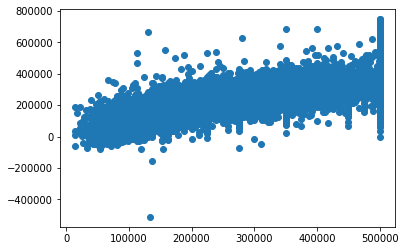

In [63]:
#Comparing machine data to actual result
import matplotlib.pyplot as plt
predict=LR.predict(X_test)
plt.scatter(Y_test,predict)

(array([2.0000e+00, 8.0000e+00, 8.1000e+01, 2.3390e+03, 1.4217e+04,
        3.3250e+03, 5.2800e+02, 5.9000e+01, 5.0000e+00, 1.0000e+00]),
 array([-533910.84796103, -415961.61553573, -298012.38311043,
        -180063.15068513,  -62113.91825983,   55835.31416546,
         173784.54659076,  291733.77901606,  409683.01144136,
         527632.24386666,  645581.47629196]),
 <BarContainer object of 10 artists>)

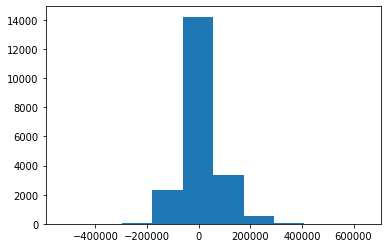

In [64]:
#Plotting the difference between the prediction and actual values
plt.hist(Y_test-predict)

<AxesSubplot:>

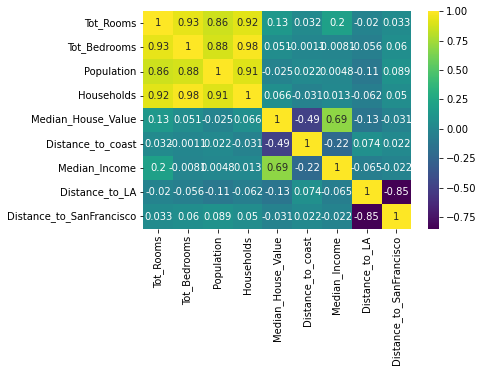

In [65]:
import seaborn as sns
sns.heatmap(Cal_house.corr(),annot=True,cmap='viridis')